In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [17]:
frequency = 440
period = 1 / frequency
sample_rate = 48000
discrete_period = int(period * sample_rate)
duration = 1
total_size = int(duration * sample_rate)
data = np.zeros((total_size), dtype=np.float32)
for i in range(int(duration / period)):
    t = np.arange(discrete_period) / sample_rate 
    data[i * discrete_period:(i + 1) * discrete_period] = np.sinc(sample_rate * t / period)

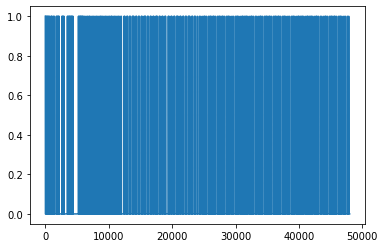

In [18]:
plt.plot(data)

In [19]:
import soundfile as sf

In [20]:
sf.write('train.wav', data, sample_rate)